**Chi-Square Test**

Background:

Mizzare Corporation has collected data on customer satisfaction levels for two types of smart home devices: Smart Thermostats and Smart Lights. They want to determine if there's a significant association between the type of device purchased and the customer's satisfaction level.

In [ ]:
import pandas as pd
import scipy.stats as stats

In [ ]:
data_sum = pd.DataFrame({
    'Smart Thermostat': [50, 80, 60, 30, 20],
    'Smart Light': [70, 100, 90, 50, 50]
}, index=['Very Satisfied', 'Satisfied', 'Neutral', 'Unsatisfied', 'Very Unsatisfied'])

# Set the name for the index column
data_sum.index.name = 'Satisfaction'

#data_sum = data_sum.reset_index()

data_sum

,Smart Thermostat,Smart Light
Satisfaction,,
Very Satisfied,50,70
Satisfied,80,100
Neutral,60,90
Unsatisfied,30,50
Very Unsatisfied,20,50


**Objective:**

To use the Chi-Square test for independence to determine if there's a significant association between the type of smart home device purchased (Smart Thermostats vs. Smart Lights) and the customer satisfaction level.

**Assignment Tasks**

**1. State the Hypothesis**

Null Hypothesis: No association between the two types of smart home devices purchased and customer satisfaction level.

Alternate Hypothesis: There is a statistically significant association between the two types of smart home devices purchased and customer satisfaction level.

**2. Compute the Chi-Square Statistic**

In [ ]:
print(stats.chi2_contingency(data_sum))

Chi2ContingencyResult(statistic=5.638227513227513, pvalue=0.22784371130697179, dof=4, expected_freq=array([[ 48.,  72.],
       [ 72., 108.],
       [ 60.,  90.],
       [ 32.,  48.],
       [ 28.,  42.]]))


**3. Determine the Critical Value**

In [ ]:
print('Critical value:', stats.chi2.isf(0.05, 4))

Critical value: 9.487729036781158


In [ ]:
#To get the p-value
print('p-value:', stats.chi2_contingency(data_sum)[1])

p-value: 0.22784371130697179


**4. Make a Decision**

Based on the calulations, critical value > statistcs Chi-Square and p-value > alpha. Therefore, we fail to reject H0 (Null hypothesis) and so there is no significant statistical association between the type of smart home device purchased (Smart Thermostats vs. Smart Lights) and the customer satisfaction level.  

**Visulaization of Chi-square**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Convert expected values to a DataFrame
expected_df = pd.DataFrame(stats.chi2_contingency(data_sum)[3], index=data_sum.index, columns=data_sum.columns)

expected_df


,Smart Thermostat,Smart Light
Satisfaction,,
Very Satisfied,48.0,72.0
Satisfied,72.0,108.0
Neutral,60.0,90.0
Unsatisfied,32.0,48.0
Very Unsatisfied,28.0,42.0


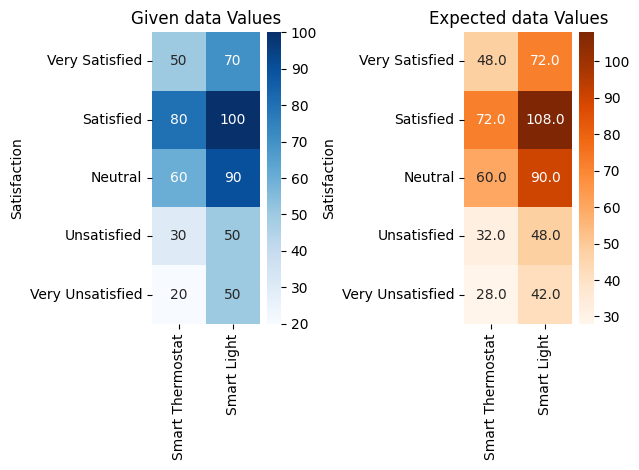

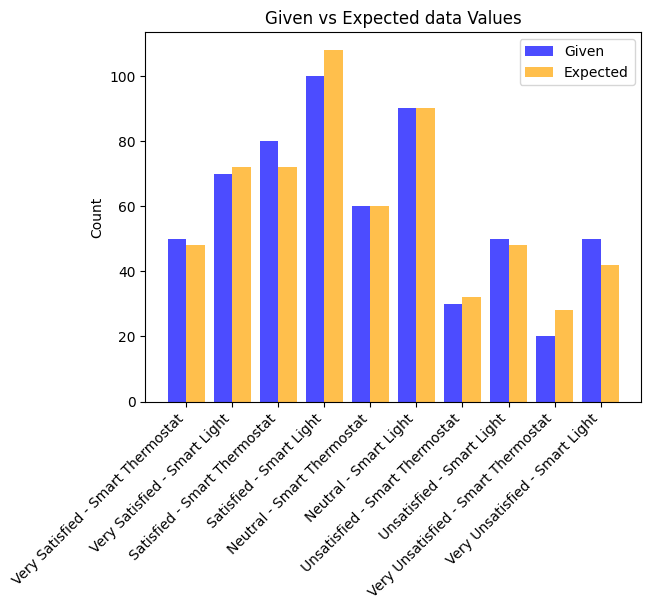

In [26]:
# Plot Observed vs Expected Heatmaps
fig, ax = plt.subplots(1, 2)

# Given data Heatmap
sns.heatmap(data_sum, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Given data Values")

# Expected data Heatmap
sns.heatmap(expected_df, annot=True, fmt=".1f", cmap="Oranges", ax=ax[1])
ax[1].set_title("Expected data Values")

plt.tight_layout()
plt.show()

# Bar Plot for Given vs Expected data
expected_flat = stats.chi2_contingency(data_sum)[3].flatten()
observed_flat = data_sum.values.flatten()
labels = [f"{row} - {col}" for row in data_sum.index for col in data_sum.columns]

x = np.arange(len(labels))

plt.bar(x - 0.2, observed_flat, width=0.4, label="Given", color = 'blue', alpha=0.7)
plt.bar(x + 0.2, expected_flat, width=0.4, label="Expected", color = 'orange', alpha=0.7)

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Count")
plt.title("Given vs Expected data Values")
plt.legend()
plt.show()